In [3]:
from helpers.get_bybit_http import get_client
import pandas as pd
# For Demo trading
client = get_client(testnet=False)


In [4]:
# get tickers example
result = client.get_tickers(category='linear')

tickers = result.get('result', {}).get('list', [])

print(tickers[0])

print(f"There are a total of {len(tickers)} from API")


{'symbol': '10000000AIDOGEUSDT', 'lastPrice': '0.0006676', 'indexPrice': '0.0006659', 'markPrice': '0.0006660', 'prevPrice24h': '0.0007629', 'price24hPcnt': '-0.124918', 'highPrice24h': '0.0007634', 'lowPrice24h': '0.0006141', 'prevPrice1h': '0.0006630', 'openInterest': '325294300', 'openInterestValue': '216646.00', 'turnover24h': '935448.1190', 'volume24h': '1374959900.0000', 'fundingRate': '0.0001', 'nextFundingTime': '1744041600000', 'predictedDeliveryPrice': '', 'basisRate': '', 'deliveryFeeRate': '', 'deliveryTime': '0', 'ask1Size': '66100', 'bid1Price': '0.0006674', 'ask1Price': '0.0006683', 'bid1Size': '10900', 'basis': '', 'preOpenPrice': '', 'preQty': '', 'curPreListingPhase': ''}
There are a total of 561 from API


In [5]:
import pandas as pd

ticker_df = pd.DataFrame(tickers)
ticker_df

,symbol,lastPrice,indexPrice,markPrice,prevPrice24h,price24hPcnt,highPrice24h,lowPrice24h,prevPrice1h,openInterest,...,deliveryFeeRate,deliveryTime,ask1Size,bid1Price,ask1Price,bid1Size,basis,preOpenPrice,preQty,curPreListingPhase
0,10000000AIDOGEUSDT,0.0006676,0.0006659,0.0006660,0.0007629,-0.124918,0.0007634,0.0006141,0.0006630,325294300,...,,0,66100,0.0006674,0.0006683,10900,,,,
1,1000000BABYDOGEUSDT,0.0010483,0.0010491,0.0010486,0.0011476,-0.086528,0.0011476,0.0009620,0.0010346,1301738800,...,,0,9600,0.0010480,0.0010485,337500,,,,
2,1000000CHEEMSUSDT,1.5474,1.5455,1.5474,1.5307,0.01091,1.5677,1.3767,1.5103,1193293,...,,0,94,1.5469,1.5471,2,,,,
3,1000000MOGUSDT,0.3025,0.3026,0.3025,0.3339,-0.09404,0.3366,0.2570,0.2968,7578983,...,,0,276,0.3018,0.3020,55,,,,
4,1000000PEIPEIUSDT,0.02987,0.02981,0.02981,0.03329,-0.102733,0.03330,0.02616,0.02899,8768840,...,,0,11250,0.02986,0.02993,481,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,ZKJUSDT,2.2652,2.2607,2.2652,2.2836,-0.008057,2.2988,2.2377,2.2646,82467704.1,...,,0,3505.3,2.2652,2.2653,297.2,,,,
557,ZKUSDT,0.05056,0.05058,0.05056,0.05853,-0.136169,0.05853,0.04555,0.04990,80580321.7,...,,0,10490.2,0.05057,0.05058,5984.5,,,,
558,ZRCUSDT,0.02458,0.02465,0.02459,0.02987,-0.1771,0.02994,0.02234,0.02441,33258733,...,,0,5942,0.02458,0.02459,13500,,,,
559,ZROUSDT,2.5724,2.5765,2.5756,2.7756,-0.073209,2.7890,2.3167,2.5162,4613182.1,...,,0,3.0,2.5732,2.5736,1.0,,,,


In [6]:
ticker_df.columns



Index(['symbol', 'lastPrice', 'indexPrice', 'markPrice', 'prevPrice24h',
       'price24hPcnt', 'highPrice24h', 'lowPrice24h', 'prevPrice1h',
       'openInterest', 'openInterestValue', 'turnover24h', 'volume24h',
       'fundingRate', 'nextFundingTime', 'predictedDeliveryPrice', 'basisRate',
       'deliveryFeeRate', 'deliveryTime', 'ask1Size', 'bid1Price', 'ask1Price',
       'bid1Size', 'basis', 'preOpenPrice', 'preQty', 'curPreListingPhase'],
      dtype='object')

## GET OHLC DATA PYBIT

In [7]:
response = client.get_kline(category='linear', 
                             symbol='ETHUSDT', 
                             interval='D').get('result', {}).get('list', [])

def format_data(data_list) -> pd.DataFrame:

    if not data_list:
        return pd.DataFrame()
    
    data = pd.DataFrame(data_list,
                        columns =[
                            'timestamp',
                            'open',
                            'high',
                            'low',
                            'close',
                            'volume',
                            'turnover'
                            ],
                        )
    data.index = pd.to_datetime(data.timestamp.astype(int), unit='ms', utc=True)
    return data[::-1].apply(pd.to_numeric)

df = format_data(response)

print(df)

                               timestamp     open     high      low    close  \
timestamp                                                                      
2024-09-20 00:00:00+00:00  1726790400000  2464.43  2571.34  2436.45  2560.85   
2024-09-21 00:00:00+00:00  1726876800000  2560.85  2621.73  2527.56  2611.25   
2024-09-22 00:00:00+00:00  1726963200000  2611.25  2632.68  2522.74  2580.01   
2024-09-23 00:00:00+00:00  1727049600000  2580.01  2702.89  2538.23  2645.75   
2024-09-24 00:00:00+00:00  1727136000000  2645.75  2672.43  2590.01  2652.70   
...                                  ...      ...      ...      ...      ...   
2025-04-03 00:00:00+00:00  1743638400000  1794.27  1844.51  1747.44  1816.29   
2025-04-04 00:00:00+00:00  1743724800000  1816.29  1835.00  1757.39  1816.08   
2025-04-05 00:00:00+00:00  1743811200000  1816.08  1827.08  1762.71  1804.99   
2025-04-06 00:00:00+00:00  1743897600000  1804.99  1816.68  1535.83  1579.98   
2025-04-07 00:00:00+00:00  1743984000000

# GET all OHLC data for Futures Symbol

In [ ]:
import datetime as dt 
import time

def get_last_timestamp(df):
    return int(df.timestamp[-1:].values[0])

start = int(dt.datetime(2022, 1, 1, tzinfo=dt.timezone.utc).timestamp()* 1000)

interval = 15
symbol = 'BTCUSDT'
df = pd.DataFrame()

while True:
    response = client.get_kline(category='linear', 
                                 symbol=symbol, 
                                 start=start,
                                 interval=interval, limit=1000)
    
    latest = format_data(response.get('result', {}).get('list',[]))
    start = get_last_timestamp(latest)
    time.sleep(0.01)
    df = pd.concat([df, latest])
    print(f'Collecting data starting {dt.datetime.fromtimestamp(start/1000)}')
    if len(latest) == 1: break


df.drop_duplicates(subset=['timestamp'], keep='last', inplace=True)

In [9]:
df

,timestamp,open,high,low,close,volume,turnover
timestamp,,,,,,,
2022-01-01 00:00:00+00:00,1640995200000,46200.5,46525.5,46200.5,46327.0,580.667,2.691828e+07
2022-01-01 00:15:00+00:00,1640996100000,46327.0,46403.0,46256.5,46373.5,246.644,1.143077e+07
2022-01-01 00:30:00+00:00,1640997000000,46373.5,46692.5,46373.5,46637.5,641.962,2.988667e+07
2022-01-01 00:45:00+00:00,1640997900000,46637.5,46736.0,46600.0,46657.0,382.823,1.787309e+07
2022-01-01 01:00:00+00:00,1640998800000,46657.0,46776.0,46580.0,46766.0,304.265,1.420206e+07
...,...,...,...,...,...,...,...
2025-04-07 11:15:00+00:00,1744024500000,77079.4,77194.6,76853.2,77046.9,1072.356,8.259330e+07
2025-04-07 11:30:00+00:00,1744025400000,77046.9,77088.1,76516.8,76575.0,2083.774,1.598725e+08
2025-04-07 11:45:00+00:00,1744026300000,76575.0,76729.7,76389.2,76650.0,1204.104,9.217454e+07


<Axes: xlabel='timestamp'>

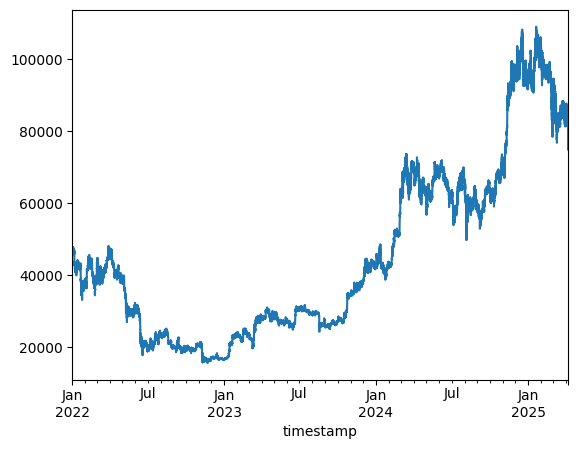

In [10]:
df.close.plot()

In [20]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


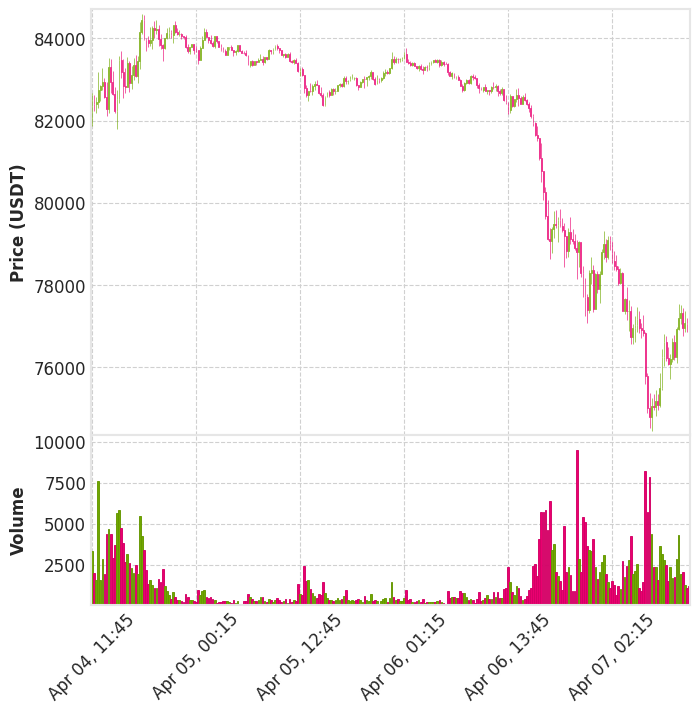

In [ ]:
import mplfinance as mpf

days_look_back = 3 * 24* 4 # 4 15 mins in 1 hour, 24 hours in 1 day , plot 7 days
ohlc_df = df[['open', 'high', 'low', 'close', 'volume']][-days_look_back:]

# Plot with style
mpf.plot(
    ohlc_df,
    type='candle',
    volume=True,
    style='binance',
    ylabel='Price (USDT)',
    figratio=(6, 6),
    figscale=1.2,
    tight_layout=True
)

## Pro TIPS 

In [11]:
## save the data to csv
df.to_csv('data/BTCUSDT_15min.csv', index=False)

In [ ]:
## we can then come back to this notebook later and load data back in
import pandas as pd 

df = pd.read_csv('data/BTCUSDT_15min.csv')
df.index = pd.to_datetime(df.timestamp, unit='ms', utc=True)

df.sort_index(inplace=True)

,timestamp,open,high,low,close,volume,turnover
timestamp,,,,,,,
2022-01-01 00:00:00+00:00,1640995200000,46200.5,46525.5,46200.5,46327.0,580.667,2.691828e+07
2022-01-01 00:15:00+00:00,1640996100000,46327.0,46403.0,46256.5,46373.5,246.644,1.143077e+07
2022-01-01 00:30:00+00:00,1640997000000,46373.5,46692.5,46373.5,46637.5,641.962,2.988667e+07
2022-01-01 00:45:00+00:00,1640997900000,46637.5,46736.0,46600.0,46657.0,382.823,1.787309e+07
2022-01-01 01:00:00+00:00,1640998800000,46657.0,46776.0,46580.0,46766.0,304.265,1.420206e+07
...,...,...,...,...,...,...,...
2025-04-07 11:15:00+00:00,1744024500000,77079.4,77194.6,76853.2,77046.9,1072.356,8.259330e+07
2025-04-07 11:30:00+00:00,1744025400000,77046.9,77088.1,76516.8,76575.0,2083.774,1.598725e+08
2025-04-07 11:45:00+00:00,1744026300000,76575.0,76729.7,76389.2,76650.0,1204.104,9.217454e+07


In [ ]:
VALID_RESAMPLE_INTERVALS = ["1min", "5min", "15min", "30min", "h", "D", "W"]


def resample_bybit_ohlc(df: pd.DataFrame, new_interval: str) -> pd.DataFrame:
    if new_interval not in VALID_RESAMPLE_INTERVALS:
        raise ValueError(
            f"'{new_interval}' is not a valid interval. Must be one of {VALID_RESAMPLE_INTERVALS}."
        )
    agg_dict = {
        "open": "first",  # take the first price for new open
        "high": "max",  # take the max price for new high
        "low": "min",  # take the min price for new low
        "close": "last",  # take the last price for new close
        "volume": "sum",  # take sum over interval for new volume
        "turnover": "sum",  # take sum over interval for new turnover
    }
    return df.resample(new_interval).agg(agg_dict)


In [16]:
hourly = resample_bybit_ohlc(df=df, new_interval='h')
daily = resample_bybit_ohlc(df=df, new_interval='D')

print(daily)

                              open     high      low    close      volume  \
timestamp                                                                   
2022-01-01 00:00:00+00:00  46200.5  47915.5  46200.5  47719.5   34577.530   
2022-01-02 00:00:00+00:00  47719.5  48000.0  46600.0  47305.0   36773.655   
2022-01-03 00:00:00+00:00  47305.0  47576.5  45700.0  46462.0   44821.196   
2022-01-04 00:00:00+00:00  46462.0  47475.0  45500.0  45870.0   54528.894   
2022-01-05 00:00:00+00:00  45870.0  47060.0  42444.0  43437.0   88336.716   
...                            ...      ...      ...      ...         ...   
2025-04-03 00:00:00+00:00  82468.1  83888.0  81146.0  83175.2  112771.731   
2025-04-04 00:00:00+00:00  83175.2  84736.0  81605.0  83862.1  177059.417   
2025-04-05 00:00:00+00:00  83862.1  84244.0  82343.0  83496.7   45495.798   
2025-04-06 00:00:00+00:00  83496.7  83774.3  77083.5  78376.1  136446.269   
2025-04-07 00:00:00+00:00  78376.1  79315.8  74456.2  77174.8  122062.143   

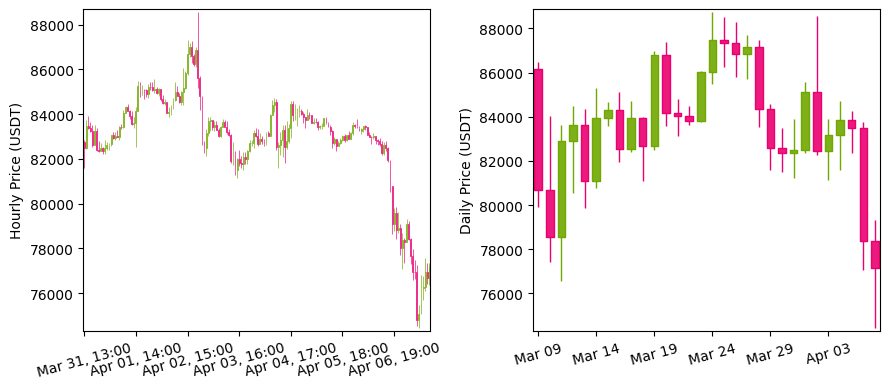

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf

# Resample the data
hourly = resample_bybit_ohlc(df=df, new_interval='h').tail(24*7)  # last 7 days of hourly
daily = resample_bybit_ohlc(df=df, new_interval='D').tail(30)     # last 30 daily candles

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), dpi=100) 

# Plot hourly data
mpf.plot(
    hourly,
    type='candle',
    ax=ax1,
    style='binance',
    ylabel='Hourly Price (USDT)',
    tight_layout=True,
    xrotation=15
)

# Plot daily data
mpf.plot(
    daily,
    type='candle',
    ax=ax2,
    style='binance',
    ylabel='Daily Price (USDT)',
    tight_layout=True,
    xrotation=15
)

plt.tight_layout()
plt.show()